### Check Password Strength using ML Algorithms

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('data.csv',',',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
#Missing Values:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [ ]:
X=data.iloc[:,0]
X

In [4]:
data=data.dropna()

In [5]:
password_tuple=np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [6]:
import random
random.shuffle(password_tuple)

In [7]:
Y=[labels[1] for labels in password_tuple]
X=[labels[0] for labels in password_tuple]

In [ ]:
Y

In [ ]:
X

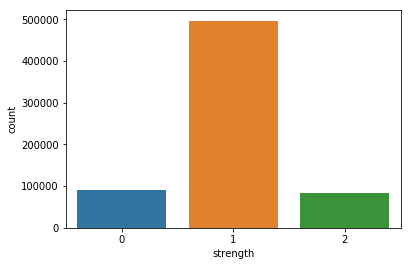

In [8]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='strength',data=data)

In [ ]:
data['password_length']=data['password'].apply(len)
data.head()

In [ ]:
data.hist(column='password_length',by='strength',bins=50,figsize=(10,6))

In [ ]:
data[data['strength']==2].head()

In [ ]:
data[data['strength']==1].head()

In [ ]:
data[data['strength']==0].head()

In [ ]:
#from above histogram we can say that for weak passwords the length is between 6 to 7 characters ,for medium passwords the length is between 8 to 13 characters and for strong passwords the length of the password is greater than 16

In [9]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [10]:
#Using TFIDF vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [11]:
vectorizer.vocabulary_

{'k': 57,
 'z': 72,
 'd': 50,
 'e': 51,
 '5': 30,
 '7': 32,
 'i': 55,
 'n': 60,
 'o': 61,
 '3': 28,
 '4': 29,
 'v': 68,
 's': 65,
 '1': 26,
 'y': 71,
 'r': 64,
 'l': 58,
 'a': 47,
 'm': 59,
 'b': 48,
 'g': 53,
 'h': 54,
 'q': 63,
 'f': 52,
 't': 66,
 '2': 27,
 'u': 67,
 '6': 31,
 'c': 49,
 '8': 33,
 'w': 69,
 '9': 34,
 'j': 56,
 '0': 25,
 '@': 40,
 '-': 22,
 'x': 70,
 'p': 62,
 '!': 12,
 '.': 23,
 '>': 38,
 '&': 17,
 '?': 39,
 '<': 36,
 '_': 45,
 ';': 35,
 '%': 16,
 '"': 13,
 '~': 76,
 '+': 21,
 '^': 44,
 '/': 24,
 '$': 15,
 ')': 19,
 ' ': 11,
 '#': 14,
 '(': 18,
 '±': 85,
 'ú': 114,
 '*': 20,
 '{': 73,
 '}': 75,
 '=': 37,
 '[': 41,
 'ô': 109,
 '\x1c': 9,
 'þ': 117,
 'ó': 108,
 '¿': 93,
 ']': 43,
 '`': 46,
 '\x05': 0,
 '\x1b': 8,
 '\\': 42,
 '\x16': 5,
 'ò': 107,
 '·': 90,
 '\x1e': 10,
 '³': 87,
 '\x19': 7,
 'ß': 94,
 'à': 95,
 'ä': 98,
 'å': 99,
 '‚': 120,
 'õ': 110,
 '\x7f': 77,
 '¾': 92,
 '²': 86,
 '°': 84,
 'ÿ': 118,
 '«': 83,
 '´': 88,
 '|': 74,
 '\x17': 6,
 '\x10': 3,
 'µ': 89,
 

In [12]:
X.shape

(669639, 125)

In [13]:
data.iloc[0,0]

'kzde5577'

In [14]:
feature_names=vectorizer.get_feature_names()
firstdocumentvector=X[0]

df=pd.DataFrame(firstdocumentvector.T.todense(), index=feature_names, columns=['tfidf'])
df.sort_values(by=['tfidf'],ascending=False)

,tfidf
7,0.591265
5,0.567342
z,0.336501
k,0.291459
d,0.285613
e,0.220845
²,0.000000
«,0.000000
°,0.000000
±,0.000000


In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
logistic=LogisticRegression(penalty='l2',multi_class='ovr')
logistic.fit(X_train,Y_train)

C:\Users\sagar\Anaconda_New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print(logistic.score(X_test,Y_test))

0.8107565258945105


In [ ]:
##Multinomial in multiclass in Logistic Regression:
clf=LogisticRegression(penalty='l2',multi_class='multinomial',solver='newton-cg')
clf.fit(X_train,Y_train)

In [ ]:
print(clf.score(X_test,Y_test))

In [19]:
X_predict=np.array(['abcdef1235'])
X_predict=vectorizer.transform(X_predict)
y_predict=logistic.predict(X_predict)
print(y_predict)

[1]


In [20]:
##XGB Classifier:
import xgboost as xgb
classifier=xgb.XGBClassifier()

In [21]:
classifier.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
print(classifier.score(X_test,Y_test))

0.9153052386356848


In [23]:
X_predict=np.array(['abcdef1235'])
X_predict=vectorizer.transform(X_predict)
y_predict=classifier.predict(X_predict)
print(y_predict)

[1]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomialnb=MultinomialNB()

In [ ]:
multinomialnb.fit(X_train,Y_train)

In [ ]:
print(multinomialnb.score(X_test,Y_test))

In [ ]:
X_predict=np.array(['abcdef1235'])
X_predict=vectorizer.transform(X_predict)
y_predict=multinomialnb.predict(X_predict)
print(y_predict)

In [24]:
import pickle

# open a file, where you ant to store the data
file = open('classification_model.pkl','wb')

# dump information to that file
pickle.dump(classifier, file)

In [26]:
file=open('vectorizer.pkl','wb')
pickle.dump(vectorizer,file)